In [31]:
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
import pandas as pd
import os
cwd = os.getcwd()
os.chdir('../src/')
import ep_utils as epu
os.chdir(cwd)

import time


In [8]:
[50*2**i for i in range(1,5)]

[100, 200, 400, 800]

In [25]:
df = pd.DataFrame(columns=['first','second'])
df

,first,second


In [48]:
master_list = []

for iteration in range(50):
# for n in [50*2**i for i in range(1,5)]:
    for dens in [.2+.1*i for i in range(0,8)]:
        print(f"running density: {dens}",end='\r')
        G = nx.random_geometric_graph(100,dens)

        # running algorithm
        start = time.perf_counter()
        eigvals = epu.getEigenvaluesNx(G)
        end = time.perf_counter()
        alg_time = end-start

        # get first iteration of CEP finder
        conns = np.sum(nx.adjacency_matrix(G),axis=1)
        conns_std, conns_mean, conns_nrm = np.std(conns), np.mean(conns), len(np.unique(conns))/G.number_of_nodes()  

        # average node degree
        deg = G.number_of_edges() / G.number_of_nodes()
        # node density
        dens = nx.density(G)
        # assortativity
        assrt = nx.degree_assortativity_coefficient(G)
        # transitivity
        trns = nx.transitivity(G)

        # diameter, average path length
        d = 0 #nx.diameter(G)
        apl = 0 #nx.average_shortest_path_length(G)
        r = 0 #nx.radius(G)

        master_list.append([iteration, dens,alg_time,conns_std,conns_mean,conns_nrm,deg,dens,assrt,trns,d,apl,r])

df = pd.DataFrame(data=master_list, columns=['iteration','random_geo_radius','alg_time','conns_std','conns_mean','conns_nrm','deg','dens','assrt','trns','d','apl','r'])


[np.float64(13.820141820131116), np.float64(11.236647947901698), np.float64(10.166346283528886), np.float64(8.9092131626573), np.float64(7.555322714522428), np.float64(7.093511596219627), np.float64(6.133895757146586), np.float64(5.718374359827821), np.float64(4.905794840781591), np.float64(4.4742770664212195), np.float64(4.266831687267439), np.float64(3.432482029295118), np.float64(3.3292110200131346), np.float64(-4.725265279496219), np.float64(2.994347002379536), np.float64(-4.176368202316491), np.float64(2.573231424076334), np.float64(2.31775607128887), np.float64(2.1651912591599274), np.float64(-3.7734091373000527), np.float64(1.4529430097108444), np.float64(-3.510743063956971), np.float64(-3.5243810439567267), np.float64(-3.236793937359054), np.float64(1.1174269611938374), np.float64(1.0351075577260187), np.float64(-3.084961779812532), np.float64(0.7863816889166703), np.float64(-2.9329693515688353), np.float64(-2.9918154099732313), np.float64(-2.831310887352207), np.float64(-2.783

In [42]:
# df = df.set_index(['random_g'])

In [49]:
df

,iteration,random_geo_radius,alg_time,conns_std,conns_mean,conns_nrm,deg,dens,assrt,trns,d,apl,r
0,0,0.104848,0.007945,3.799421,10.38,0.16,5.19,0.104848,0.492309,0.606440,0,0,0
1,0,0.199192,0.009834,4.994157,19.72,0.23,9.86,0.199192,0.292984,0.622989,0,0,0
2,0,0.334343,0.011494,8.117266,33.10,0.31,16.55,0.334343,0.249561,0.687682,0,0,0
3,0,0.458788,0.021296,13.550041,45.42,0.43,22.71,0.458788,0.094511,0.712424,0,0,0
4,0,0.660000,0.015879,16.039464,65.34,0.50,32.67,0.660000,-0.042420,0.785539,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,49,0.455354,0.013573,12.702504,45.08,0.38,22.54,0.455354,0.075197,0.702608,0,0,0
396,49,0.693535,0.014426,15.737992,68.66,0.45,34.33,0.693535,-0.065425,0.800970,0,0,0
397,49,0.725253,0.014090,15.385708,71.80,0.51,35.90,0.725253,-0.062833,0.823520,0,0,0
398,49,0.854545,0.013302,11.955752,84.60,0.36,42.30,0.854545,-0.089535,0.893360,0,0,0


In [50]:
df.corr()['alg_time']

iteration            0.040485
random_geo_radius    0.233008
alg_time             1.000000
conns_std            0.285837
conns_mean           0.233008
conns_nrm            0.249784
deg                  0.233008
dens                 0.233008
assrt               -0.264089
trns                 0.197656
d                         NaN
apl                       NaN
r                         NaN
Name: alg_time, dtype: float64

In [59]:
df.iloc[:,:5]

,iteration,random_geo_radius,alg_time,conns_std,conns_mean
0,0,0.104848,0.007945,3.799421,10.38
1,0,0.199192,0.009834,4.994157,19.72
2,0,0.334343,0.011494,8.117266,33.10
3,0,0.458788,0.021296,13.550041,45.42
4,0,0.660000,0.015879,16.039464,65.34
...,...,...,...,...,...
395,49,0.455354,0.013573,12.702504,45.08
396,49,0.693535,0.014426,15.737992,68.66
397,49,0.725253,0.014090,15.385708,71.80
398,49,0.854545,0.013302,11.955752,84.60


array([[<Axes: xlabel='iteration', ylabel='iteration'>,
        <Axes: xlabel='random_geo_radius', ylabel='iteration'>,
        <Axes: xlabel='alg_time', ylabel='iteration'>,
        <Axes: xlabel='conns_std', ylabel='iteration'>,
        <Axes: xlabel='conns_mean', ylabel='iteration'>],
       [<Axes: xlabel='iteration', ylabel='random_geo_radius'>,
        <Axes: xlabel='random_geo_radius', ylabel='random_geo_radius'>,
        <Axes: xlabel='alg_time', ylabel='random_geo_radius'>,
        <Axes: xlabel='conns_std', ylabel='random_geo_radius'>,
        <Axes: xlabel='conns_mean', ylabel='random_geo_radius'>],
       [<Axes: xlabel='iteration', ylabel='alg_time'>,
        <Axes: xlabel='random_geo_radius', ylabel='alg_time'>,
        <Axes: xlabel='alg_time', ylabel='alg_time'>,
        <Axes: xlabel='conns_std', ylabel='alg_time'>,
        <Axes: xlabel='conns_mean', ylabel='alg_time'>],
       [<Axes: xlabel='iteration', ylabel='conns_std'>,
        <Axes: xlabel='random_geo_radius',

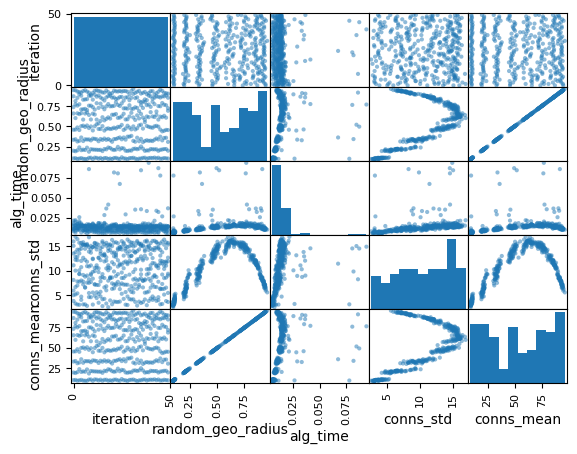

In [60]:
pd.plotting.scatter_matrix(df.iloc[:,:5])